In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Credit-Card-Fraud-Detection/main/creditCardFraud_28011964_120214.csv")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [3]:
df.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,167532.467532,1.589411,1.776224,1.604396,34.945055,-0.004995,-0.161838,-0.164835,-0.283716,-0.283716,...,40748.408591,39078.666334,38012.011988,5382.339660,5051.400599,4176.149850,4671.488511,5331.049950,5090.704296,0.213786
std,130587.921320,0.492187,0.750916,0.532298,9.219760,1.173446,1.228732,1.262459,1.184662,1.170224,...,68206.929510,63108.238729,63074.415024,12180.755275,15626.153184,10514.647502,13269.943983,16812.536877,23658.888052,0.410183
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3684.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1423.000000,1206.000000,830.000000,1000.000000,390.000000,228.000000,148.000000,189.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17710.000000,17580.000000,15846.000000,2184.000000,1710.000000,1206.000000,1398.000000,1306.000000,1250.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48851.000000,46404.000000,46557.000000,5090.000000,4500.000000,3720.000000,4000.000000,3745.000000,3784.000000,0.000000
max,700000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,628699.000000,484612.000000,473944.000000,199646.000000,285138.000000,133657.000000,188840.000000,195599.000000,528666.000000,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,1001.0,167532.467532,130587.921320,10000.0,50000.0,140000.0,240000.0,700000.0
SEX,1001.0,1.589411,0.492187,1.0,1.0,2.0,2.0,2.0
EDUCATION,1001.0,1.776224,0.750916,1.0,1.0,2.0,2.0,6.0
MARRIAGE,1001.0,1.604396,0.532298,0.0,1.0,2.0,2.0,3.0
AGE,1001.0,34.945055,9.219760,21.0,28.0,33.0,41.0,75.0
PAY_0,1001.0,-0.004995,1.173446,-2.0,-1.0,0.0,0.0,8.0
PAY_2,1001.0,-0.161838,1.228732,-2.0,-1.0,0.0,0.0,7.0
PAY_3,1001.0,-0.164835,1.262459,-2.0,-1.0,0.0,0.0,7.0
PAY_4,1001.0,-0.283716,1.184662,-2.0,-1.0,0.0,0.0,7.0
PAY_5,1001.0,-0.283716,1.170224,-2.0,-1.0,0.0,0.0,7.0


In [7]:
#from pandas_profiling import ProfileReport  

In [8]:
#!pip install pandas-profiling

In [9]:
#!pip install pydantic-settings

In [10]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.skew()

LIMIT_BAL                      1.011019
SEX                           -0.364047
EDUCATION                      0.875019
MARRIAGE                      -0.104653
AGE                            0.817570
PAY_0                          1.509158
PAY_2                          1.208410
PAY_3                          1.226851
PAY_4                          1.217037
PAY_5                          1.053218
PAY_6                          1.064620
BILL_AMT1                      2.671027
BILL_AMT2                      2.777126
BILL_AMT3                      2.901497
BILL_AMT4                      3.578203
BILL_AMT5                      3.107180
BILL_AMT6                      2.636691
PAY_AMT1                       7.749893
PAY_AMT2                      10.752948
PAY_AMT3                       6.744377
PAY_AMT4                       7.454775
PAY_AMT5                       7.034632
PAY_AMT6                      15.241538
default payment next month     1.398337
dtype: float64

In [13]:
x=df.iloc[:,:-1]
y=df["default payment next month"]

In [14]:
#sns.pairplot(df)

<AxesSubplot: >

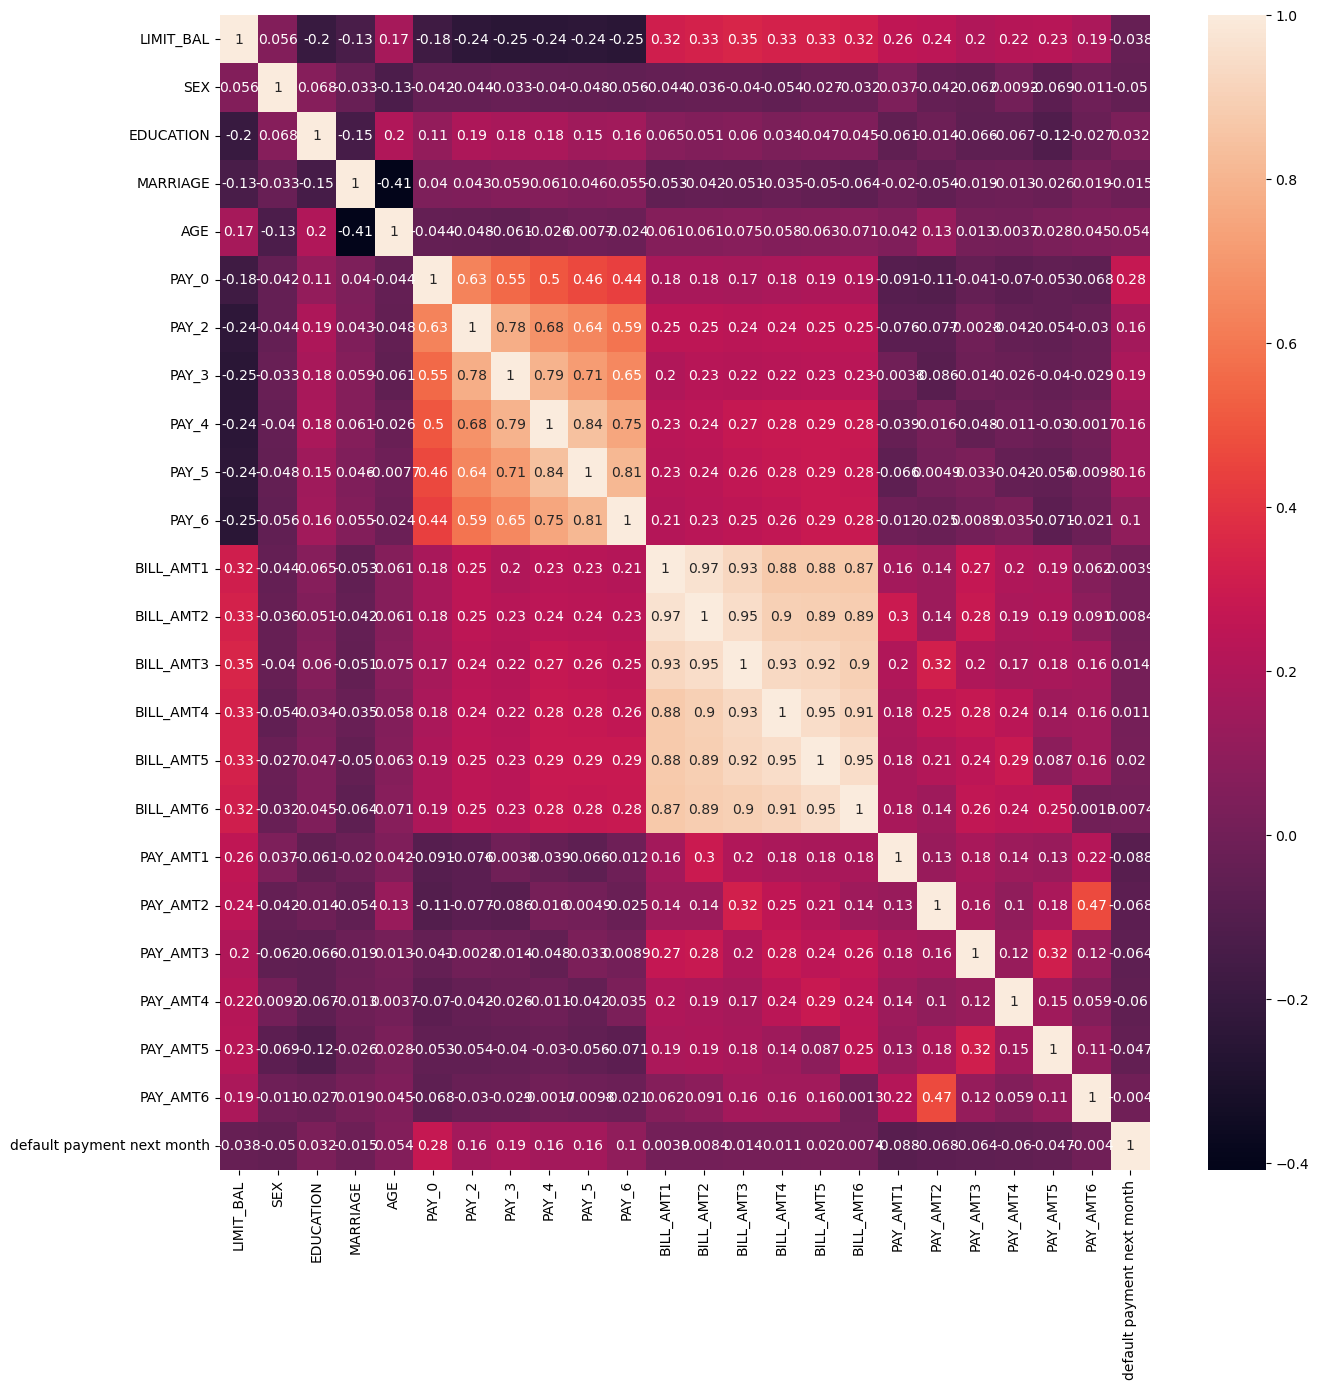

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [18]:
x_train.shape

(700, 23)

## SCALING THE DATA

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss=StandardScaler()

In [21]:
x_scaled_train=ss.fit_transform(x_train)
x_scaled_test=ss.fit_transform(x_test)

In [22]:
x_scaled_train

array([[ 0.5414973 , -1.19959343, -1.03690208, ...,  0.30029822,
         0.14184692,  0.10485884],
       [ 0.46524541,  0.83361577, -1.03690208, ...,  0.50718682,
         0.08514383, -0.20352712],
       [-1.13604411,  0.83361577,  1.61696065, ..., -0.10330007,
        -0.22379799, -0.15947198],
       ...,
       [ 0.23648977, -1.19959343, -1.03690208, ..., -0.21890942,
        -0.1394184 , -0.09338928],
       [-0.67853282,  0.83361577, -1.03690208, ...,  2.94847233,
        -0.20692207, -0.12863339],
       [-0.67853282,  0.83361577,  0.29002928, ..., -0.26657656,
        -0.24348656, -0.15793005]])

In [23]:
x_scaled_test

array([[ 4.32916587e-01,  8.36997594e-01,  3.17388378e-01, ...,
        -3.43234841e-01, -1.46847662e-01,  5.73578289e+00],
       [ 1.51816971e+00,  8.36997594e-01, -1.02815953e+00, ...,
        -3.01942094e-01, -1.03647746e-01, -2.40840651e-01],
       [ 4.53261864e-02, -1.19474657e+00,  1.66293629e+00, ...,
        -2.36315324e-02,  8.16233876e-04, -4.61674328e-02],
       ...,
       [ 7.42988907e-01,  8.36997594e-01, -1.02815953e+00, ...,
         1.08225984e+00, -3.49264126e-01, -9.91185482e-02],
       [-8.84890775e-01, -1.19474657e+00,  1.66293629e+00, ...,
        -3.11274510e-01, -3.07254483e-01, -2.17479865e-01],
       [ 1.75072395e+00,  8.36997594e-01, -1.02815953e+00, ...,
        -2.15393518e-01,  8.16233876e-04, -4.61674328e-02]])

In [24]:
#sns.histplot(x_scaled_train,kde=True)

In [25]:
df1=pd.DataFrame(x_scaled_train,columns=x_train.columns,index=x_train.index)
df1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
440,0.541497,-1.199593,-1.036902,0.745197,0.984139,-0.024032,0.123878,0.109884,0.221295,0.223339,...,2.588845,2.258023,2.377089,2.533124,0.590897,0.209697,0.284428,0.300298,0.141847,0.104859
482,0.465245,0.833616,-1.036902,-1.137973,0.767437,-0.865150,-0.671669,-0.675002,-0.620587,-0.626321,...,-0.463000,-0.604306,-0.453815,-0.507899,0.867197,0.442410,-0.385675,0.507187,0.085144,-0.203527
422,-1.136044,0.833616,1.616961,0.745197,1.525896,1.658204,1.714973,1.679655,1.905057,0.223339,...,-0.464076,-0.424800,-0.379514,-0.358562,-0.217496,-0.210922,-0.385675,-0.103300,-0.223798,-0.159472
852,-0.983540,0.833616,-1.036902,0.745197,-0.641130,-0.024032,0.123878,1.679655,1.905057,1.922659,...,-0.228934,-0.185449,-0.093730,-0.072109,-0.181671,-0.210922,-0.385675,0.052032,-0.235049,-0.203527
950,-0.449777,0.833616,0.290029,-1.137973,1.200842,-0.865150,-0.671669,-0.675002,-0.620587,-0.626321,...,-0.614688,-0.579783,1.040695,1.092107,-0.293534,-0.173901,-0.230012,8.541995,-0.026912,-0.049334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.227764,0.833616,-1.036902,-1.137973,-0.424428,-0.024032,0.123878,1.679655,0.221295,0.223339,...,0.811115,0.906383,1.023762,1.081789,0.343166,-0.294934,-0.060313,-0.022448,0.580283,-0.203527
270,1.456520,0.833616,0.290029,0.745197,-0.749481,-1.706267,-1.467217,-1.459887,-1.462468,-1.475980,...,-0.644477,-0.604306,-0.615441,-0.618721,-0.486184,-0.294934,-0.385675,-0.361745,-0.308178,-0.203527
860,0.236490,-1.199593,-1.036902,0.745197,-0.316076,-0.024032,0.123878,0.109884,0.221295,0.223339,...,-0.016249,0.095031,0.115090,0.168475,-0.330434,-0.196584,-0.144619,-0.218909,-0.139418,-0.093389
435,-0.678533,0.833616,-1.036902,0.745197,-1.291238,-0.024032,0.123878,0.109884,0.221295,0.223339,...,0.152367,-0.067314,0.096249,0.127963,-0.198508,-0.205321,-0.299105,2.948472,-0.206922,-0.128633


In [26]:
df2=pd.DataFrame(x_scaled_test,columns=x_test.columns,index=x_test.index)
df2

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
521,0.432917,0.836998,0.317388,0.739830,-0.872357,-0.810846,-0.711470,-0.631552,-0.568860,-0.580160,...,-0.652480,-0.555472,-0.633224,-0.520787,0.559737,-0.494158,-0.235343,-0.343235,-0.146848,5.735783
941,1.518170,0.836998,-1.028160,0.739830,-0.654539,0.073446,0.152048,-0.631552,-0.568860,-0.580160,...,-0.643222,-0.568535,-0.622162,-0.510972,-0.300066,-0.425663,-0.325767,-0.301942,-0.103648,-0.240841
741,0.045326,-1.194747,1.662936,0.739830,0.325641,0.073446,0.152048,0.180829,0.283015,0.288637,...,-0.266070,-0.180743,-0.120360,-0.019017,-0.229878,-0.306187,-0.216864,-0.023632,0.000816,-0.046167
980,-0.884891,0.836998,-1.028160,0.739830,-1.307992,-1.695139,-1.574987,-1.443933,-1.420734,-1.448956,...,0.151517,-0.266698,-0.311676,-0.276098,-0.194784,-0.391476,-0.335280,-0.259179,0.003757,-0.143037
411,-0.884891,0.836998,1.662936,-1.131505,-0.001085,-0.810846,-0.711470,-0.631552,-1.420734,-1.448956,...,-0.659500,-0.584393,-0.633224,-0.566775,-0.019314,-0.546099,-0.435545,-0.343235,-0.349264,-0.215922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,-0.884891,0.836998,-1.028160,0.739830,-1.090174,0.073446,0.152048,0.180829,0.283015,0.288637,...,-0.220203,-0.291590,-0.289020,-0.254511,-0.236897,-0.374802,-0.369941,-0.151473,-0.349264,-0.201906
428,-0.419782,0.836998,-1.028160,0.739830,-0.654539,0.073446,0.152048,0.180829,0.283015,0.288637,...,0.158002,0.220980,0.257494,0.279599,-0.194784,-0.246209,-0.216864,-0.215394,-0.205241,-0.143504
7,0.742989,0.836998,-1.028160,0.739830,1.741457,-0.810846,-0.711470,-0.631552,-0.568860,-0.580160,...,-0.497919,-0.449869,-0.251569,-0.349352,1.161107,0.649384,0.502923,1.082260,-0.349264,-0.099119
155,-0.884891,-1.194747,1.662936,-1.131505,2.394910,2.726324,1.879083,0.180829,0.283015,0.288637,...,-0.441481,-0.372317,-0.398429,-0.342750,-0.370254,-0.354170,-0.380875,-0.311275,-0.307254,-0.217480


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [28]:
model_nb=GaussianNB()

In [29]:
model_rfc=RandomForestClassifier()

In [30]:
model_nb.fit(x_scaled_train,y_train)

GaussianNB()

In [31]:
model_rfc.fit(x_scaled_train,y_train)

RandomForestClassifier()

In [32]:
y_pred_nb=model_nb.predict(x_scaled_test)

In [33]:
y_pred_nb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
print(accuracy_score(y_test,y_pred_nb))

0.6710963455149501


In [36]:
# 01:34:33

In [37]:
y_pred_rfc=model_rfc.predict(x_scaled_test)

In [38]:
print(accuracy_score(y_test,y_pred_rfc))

0.8305647840531561


In [40]:
print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

[[171  80]
 [ 19  31]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       251
           1       0.28      0.62      0.39        50

    accuracy                           0.67       301
   macro avg       0.59      0.65      0.58       301
weighted avg       0.80      0.67      0.71       301



In [41]:
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

[[240  11]
 [ 40  10]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       251
           1       0.48      0.20      0.28        50

    accuracy                           0.83       301
   macro avg       0.67      0.58      0.59       301
weighted avg       0.79      0.83      0.80       301



## HYPERPARAMETER TUNING


In [42]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid={'var_smoothing':[0.1,0.01,0.5,0.005,0.001,1e-10,1e-6,1e-8,1e-11]}

In [52]:
grid=GridSearchCV(estimator=model_nb,param_grid=param_grid,cv=5,verbose=3)

In [53]:
grid.fit(x_scaled_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .................var_smoothing=0.1;, score=0.364 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.764 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.721 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.679 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.714 total time=   0.0s
[CV 1/5] END ................var_smoothing=0.01;, score=0.336 total time=   0.0s
[CV 2/5] END ................var_smoothing=0.01;, score=0.743 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.01;, score=0.693 total time=   0.0s
[CV 4/5] END ................var_smoothing=0.01;, score=0.679 total time=   0.0s
[CV 5/5] END ................var_smoothing=0.01;, score=0.693 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.5;, score=0.714 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.5;,

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.01, 0.5, 0.005, 0.001, 1e-10,
                                           1e-06, 1e-08, 1e-11]},
             verbose=3)

In [54]:
grid.best_params_

{'var_smoothing': 0.5}

In [58]:
grid.best_estimator_

GaussianNB(var_smoothing=0.5)

In [59]:
model_nb_new=GaussianNB(var_smoothing=0.5)

In [60]:
model_nb_new.fit(x_scaled_train,y_train)

GaussianNB(var_smoothing=0.5)

In [61]:
y_pred_nb_new=model_nb_new.predict(x_scaled_test)

In [62]:
print(accuracy_score(y_test,y_pred_nb_new))

0.7807308970099668


In [75]:
param_grid_2={'n_estimators':[50,150,200],
            'max_depth':range(3,11,1),
            'random_state':[0,50,100],
            'criterion':['gini','entropy']}

In [76]:
grid2=GridSearchCV(model_rfc,param_grid=param_grid_2,cv=5,verbose=3)

In [77]:
grid2.fit(x_scaled_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.743 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 11),
                         'n_estimators': [50, 150, 200],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [98]:
model_rfc_new=RandomForestClassifier(**grid2.best_params_)
model_rfc_new.fit(x_scaled_train,y_train)
y_pred_rfc_new=model_rfc_new.predict(x_scaled_test)


In [99]:
grid2.best_params_


{'criterion': 'entropy',
 'max_depth': 5,
 'n_estimators': 200,
 'random_state': 0}

In [100]:
print(accuracy_score(y_test,y_pred_rfc_new))

0.8504983388704319


In [101]:
print(classification_report(y_test,y_pred_rfc_new))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       251
           1       0.73      0.16      0.26        50

    accuracy                           0.85       301
   macro avg       0.79      0.57      0.59       301
weighted avg       0.83      0.85      0.81       301

